CRYPTOCURRENCY LAUNCH SIMULATION - FROM DAY ZERO

Simulating 180 days from initial launch...
Phase 1 (Days 0-7):   Launch/Price Discovery - Explosive growth
Phase 2 (Days 8-30):  Early Trading - High volatility, stabilizing
Phase 3 (Days 31+):   Mature Trading - Normal market dynamics


SIMULATION STATISTICS
Initial Price..................................... 0.01
Final Price....................................... 0.05
Total Return (%).................................. 406.27
Max Price......................................... 0.21
Min Price......................................... 0.01
Price Range (Max/Min)............................. 21.10
Volatility (annualized %)......................... 30.04
Total Jumps....................................... 44
Jump Frequency (per day).......................... 0.24
Max Single Return (%)............................. 28.13
Min Single Return (%)............................. -21.54
Phase 1 Return (%)................................ 142.26
Phase 1 Jum

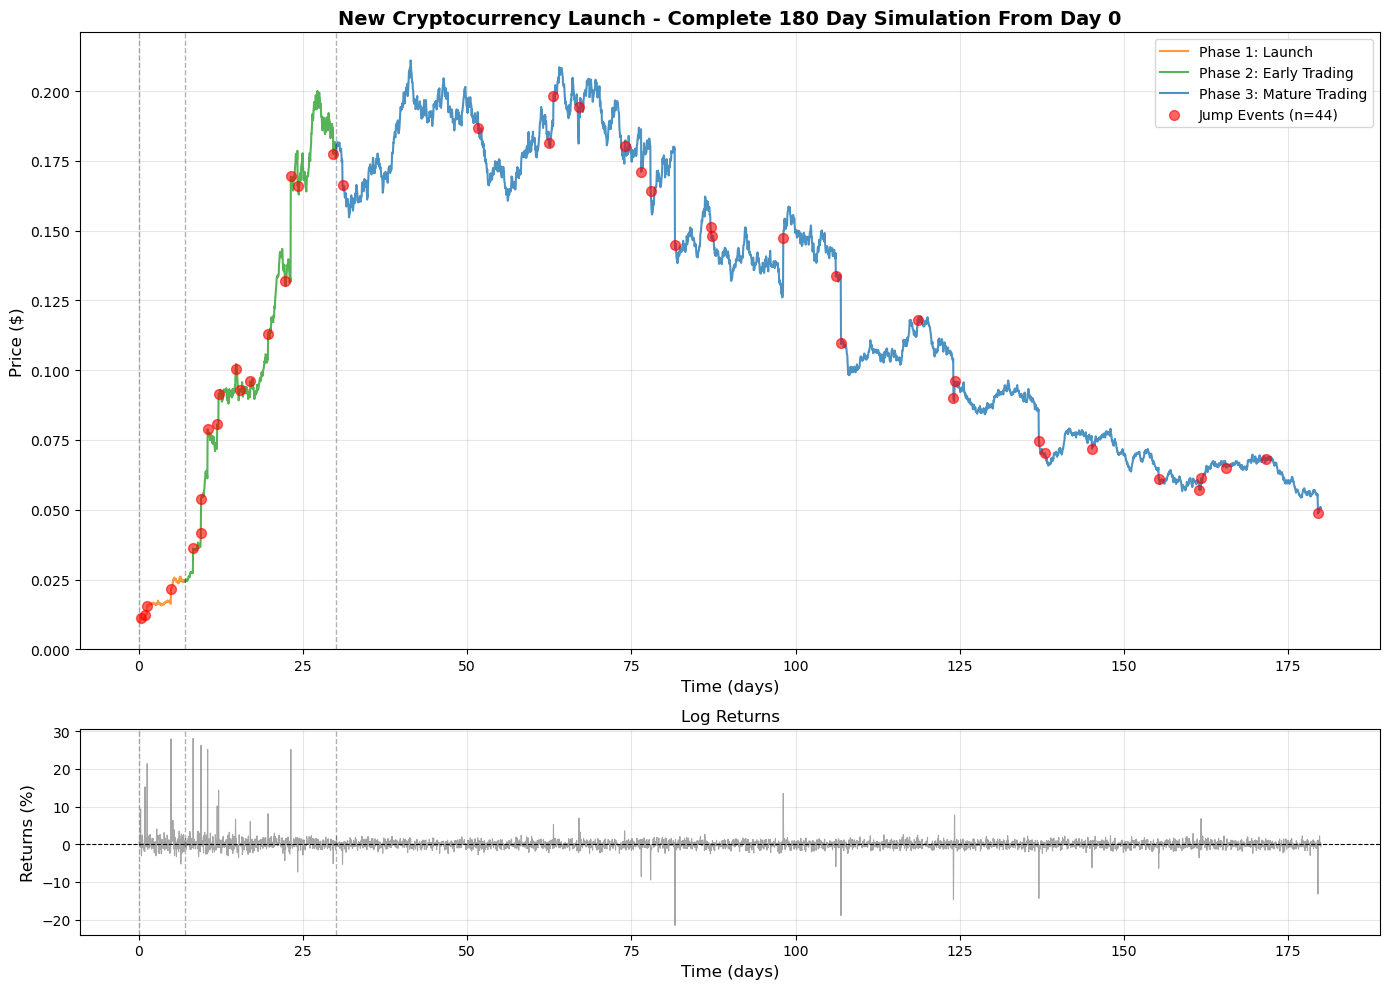


EXTENDED SIMULATION - 1 YEAR FROM LAUNCH

Key Statistics:
Initial Price: $0.0100
Final Price: $0.12
Total Return: 1143.7%
Price Multiplier: 37.1x
Total Jumps: 83


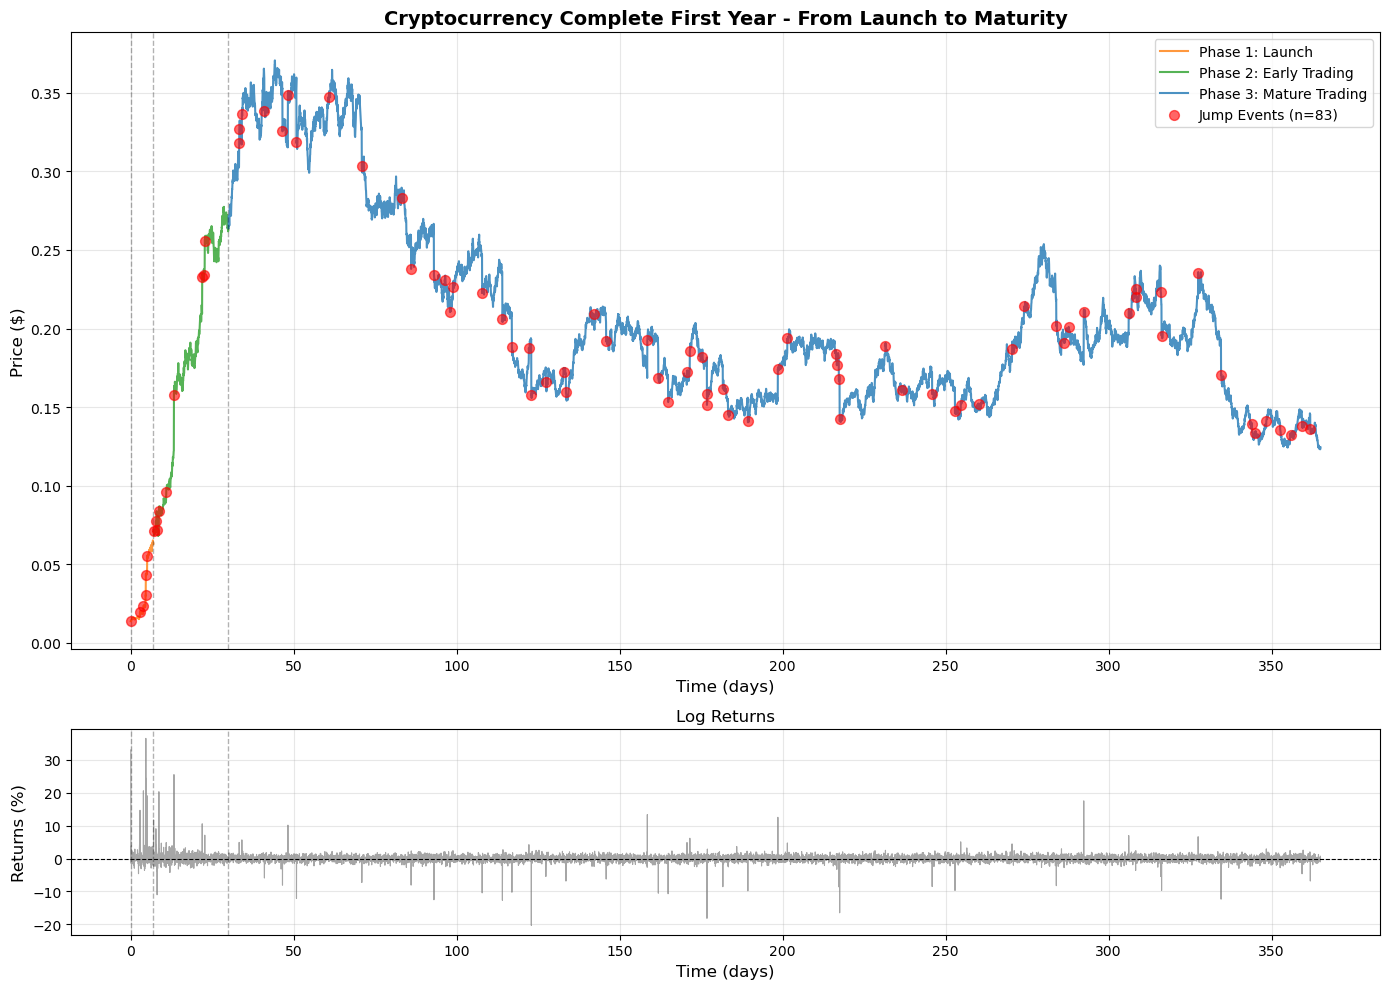


Simulation complete!
Note: The y-axis uses log scale when price range exceeds 100x
This is typical for crypto launches that start at $0.01


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class CryptoJumpDiffusion:
    """
    Simulates cryptocurrency prices using Merton's Jump Diffusion Model.
    
    The model combines:
    1. Geometric Brownian Motion (continuous price changes)
    2. Poisson jump process (sudden price shocks)
    
    This is ideal for modeling new cryptocurrencies with high volatility and
    susceptibility to sudden market events.
    """
    
    def __init__(self, 
                 initial_price=100.0,
                 drift=0.0002,           # Daily drift (0.02% per day = ~7.3% annual)
                 volatility=0.03,        # Daily volatility (3% per day = ~47% annual)
                 jump_intensity=0.15,    # Average jumps per day (λ in Poisson process)
                 jump_mean=-0.01,        # Average jump size (-1% = slight downward bias)
                 jump_std=0.05):         # Jump size volatility (5%)
        """
        Initialize the jump diffusion model parameters.
        
        Args:
            initial_price: Starting price of the cryptocurrency
            drift: Expected return per time step (mu)
            volatility: Standard deviation of continuous returns (sigma)
            jump_intensity: Average number of jumps per time step (lambda)
            jump_mean: Mean of jump size distribution
            jump_std: Standard deviation of jump sizes
        """
        self.S0 = initial_price
        self.mu = drift
        self.sigma = volatility
        self.lambda_jump = jump_intensity
        self.jump_mu = jump_mean
        self.jump_sigma = jump_std
        
    def simulate(self, days=365, steps_per_day=24):
        """
        Simulate cryptocurrency price path using jump diffusion.
        
        Args:
            days: Number of days to simulate
            steps_per_day: Time steps per day (24 = hourly, 1 = daily)
            
        Returns:
            times: Array of time points
            prices: Array of simulated prices
            jumps: Boolean array indicating when jumps occurred
        """
        # Total number of time steps
        n_steps = days * steps_per_day
        dt = 1.0 / steps_per_day  # Time increment (fraction of a day)
        
        # Initialize arrays
        prices = np.zeros(n_steps + 1)
        prices[0] = self.S0
        jumps = np.zeros(n_steps + 1, dtype=bool)
        
        # Generate all random variables at once for efficiency
        # Brownian motion increments
        dW = np.random.normal(0, np.sqrt(dt), n_steps)
        
        # Jump occurrences (Poisson process)
        jump_occurred = np.random.poisson(self.lambda_jump * dt, n_steps)
        
        # Jump sizes (when jumps occur)
        jump_sizes = np.random.normal(self.jump_mu, self.jump_sigma, n_steps)
        
        # Simulate price path
        for i in range(n_steps):
            # Continuous component (Geometric Brownian Motion)
            # dS/S = mu*dt + sigma*dW
            continuous_return = (self.mu - 0.5 * self.sigma**2) * dt + self.sigma * dW[i]
            
            # Jump component
            # If a jump occurs, add the jump return
            jump_return = 0
            if jump_occurred[i] > 0:
                jumps[i+1] = True
                # Can have multiple jumps in one period (though rare)
                jump_return = np.sum(np.random.normal(self.jump_mu, 
                                                      self.jump_sigma, 
                                                      jump_occurred[i]))
            
            # Total return and new price
            total_return = continuous_return + jump_return
            prices[i+1] = prices[i] * np.exp(total_return)
        
        # Create time array (in days)
        times = np.linspace(0, days, n_steps + 1)
        
        return times, prices, jumps
    
    def simulate_with_maturation(self, days=365, steps_per_day=24, 
                                  maturation_rate=0.5):
        """
        Simulate with decreasing volatility over time (coin maturation effect).
        
        As a cryptocurrency matures, volatility and jump frequency typically decrease
        as liquidity increases and the market stabilizes.
        
        Args:
            days: Number of days to simulate
            steps_per_day: Time steps per day
            maturation_rate: Rate at which volatility/jumps decrease (0-1)
            
        Returns:
            times: Array of time points
            prices: Array of simulated prices
            jumps: Boolean array indicating when jumps occurred
        """
        n_steps = days * steps_per_day
        dt = 1.0 / steps_per_day
        
        prices = np.zeros(n_steps + 1)
        prices[0] = self.S0
        jumps = np.zeros(n_steps + 1, dtype=bool)
        
        for i in range(n_steps):
            # Time-dependent volatility (exponential decay)
            t = i * dt / days  # Normalized time (0 to 1)
            current_sigma = self.sigma * np.exp(-maturation_rate * t)
            current_lambda = self.lambda_jump * np.exp(-maturation_rate * t)
            
            # Continuous component
            dW = np.random.normal(0, np.sqrt(dt))
            continuous_return = (self.mu - 0.5 * current_sigma**2) * dt + current_sigma * dW
            
            # Jump component with time-varying intensity
            jump_occurred = np.random.poisson(current_lambda * dt)
            jump_return = 0
            if jump_occurred > 0:
                jumps[i+1] = True
                jump_return = np.sum(np.random.normal(self.jump_mu, 
                                                      self.jump_sigma, 
                                                      jump_occurred))
            
            total_return = continuous_return + jump_return
            prices[i+1] = prices[i] * np.exp(total_return)
        
        times = np.linspace(0, days, n_steps + 1)
        return times, prices, jumps
    
    def simulate_from_launch(self, days=365, steps_per_day=24, 
                            launch_price=0.01,
                            phase1_days=7,
                            phase2_days=23):
        """
        Simulate cryptocurrency from initial launch (day 0) with realistic launch dynamics.
        
        Models three distinct phases:
        Phase 1 (Days 0-7): Launch/Price Discovery
            - Explosive growth with strong positive drift
            - Very high volatility and jump frequency
            - Asymmetric jumps (mostly positive - FOMO effect)
        
        Phase 2 (Days 8-30): Early Trading
            - Decreasing but still high volatility
            - Balanced jumps (profit-taking begins)
            - Moderate positive drift
        
        Phase 3 (Day 31+): Mature Trading
            - Normal market dynamics using base parameters
            - Lower volatility and jump frequency
        
        Args:
            days: Total number of days to simulate
            steps_per_day: Time steps per day (24 = hourly)
            launch_price: Initial price at launch (e.g., ICO price)
            phase1_days: Duration of launch phase (default 7 days)
            phase2_days: Duration of early trading phase (default 23 days)
            
        Returns:
            times: Array of time points
            prices: Array of simulated prices
            jumps: Boolean array indicating when jumps occurred
            phases: Array indicating which phase each point belongs to (1, 2, or 3)
        """
        n_steps = days * steps_per_day
        dt = 1.0 / steps_per_day
        
        # Convert phase durations to step counts
        phase1_steps = int(phase1_days * steps_per_day)
        phase2_steps = int(phase2_days * steps_per_day)
        
        prices = np.zeros(n_steps + 1)
        prices[0] = launch_price
        jumps = np.zeros(n_steps + 1, dtype=bool)
        phases = np.zeros(n_steps + 1, dtype=int)
        
        for i in range(n_steps):
            current_day = i / steps_per_day
            
            # Determine current phase and set parameters accordingly
            if i < phase1_steps:
                # PHASE 1: Launch/Price Discovery (Days 0-7)
                phases[i+1] = 1
                current_mu = 0.015           # Strong positive drift (15x normal)
                current_sigma = 0.08         # Very high volatility
                current_lambda = 0.8         # ~0.8 jumps per day (very frequent)
                current_jump_mu = 0.15       # Large positive jumps (15% average)
                current_jump_sigma = 0.12    # High jump variability
                
            elif i < phase1_steps + phase2_steps:
                # PHASE 2: Early Trading (Days 8-30)
                phases[i+1] = 2
                # Smooth transition from Phase 1 to Phase 3
                progress = (i - phase1_steps) / phase2_steps
                current_mu = 0.015 * (1 - progress) + self.mu * progress
                current_sigma = 0.08 * (1 - progress) + self.sigma * progress
                current_lambda = 0.8 * (1 - progress) + self.lambda_jump * progress
                current_jump_mu = 0.15 * (1 - progress) + self.jump_mu * progress
                current_jump_sigma = 0.12 * (1 - progress) + self.jump_sigma * progress
                
            else:
                # PHASE 3: Mature Trading (Day 31+)
                phases[i+1] = 3
                current_mu = self.mu
                current_sigma = self.sigma
                current_lambda = self.lambda_jump
                current_jump_mu = self.jump_mu
                current_jump_sigma = self.jump_sigma
            
            # Continuous component (Geometric Brownian Motion)
            dW = np.random.normal(0, np.sqrt(dt))
            continuous_return = (current_mu - 0.5 * current_sigma**2) * dt + current_sigma * dW
            
            # Jump component with phase-specific parameters
            jump_occurred = np.random.poisson(current_lambda * dt)
            jump_return = 0
            if jump_occurred > 0:
                jumps[i+1] = True
                jump_return = np.sum(np.random.normal(current_jump_mu, 
                                                      current_jump_sigma, 
                                                      jump_occurred))
            
            # Total return and new price
            total_return = continuous_return + jump_return
            prices[i+1] = prices[i] * np.exp(total_return)
        
        times = np.linspace(0, days, n_steps + 1)
        return times, prices, jumps, phases


def plot_simulation(times, prices, jumps, title="Cryptocurrency Price Simulation", phases=None):
    """
    Create a professional visualization of the simulated price path.
    
    Args:
        times: Array of time points (in days)
        prices: Array of simulated prices
        jumps: Boolean array indicating jump events
        title: Plot title
        phases: Optional array indicating trading phases (for launch simulations)
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), 
                                     gridspec_kw={'height_ratios': [3, 1]})
    
    # Main price chart
    if phases is not None:
        # Color-code by phase for launch simulations
        phase1_mask = phases == 1
        phase2_mask = phases == 2
        phase3_mask = phases == 3
        
        if np.any(phase1_mask):
            ax1.plot(times[phase1_mask], prices[phase1_mask], linewidth=1.5, 
                    color='#ff7f0e', alpha=0.8, label='Phase 1: Launch')
        if np.any(phase2_mask):
            ax1.plot(times[phase2_mask], prices[phase2_mask], linewidth=1.5, 
                    color='#2ca02c', alpha=0.8, label='Phase 2: Early Trading')
        if np.any(phase3_mask):
            ax1.plot(times[phase3_mask], prices[phase3_mask], linewidth=1.5, 
                    color='#1f77b4', alpha=0.8, label='Phase 3: Mature Trading')
    else:
        ax1.plot(times, prices, linewidth=1.5, color='#1f77b4', alpha=0.8)
    
    # Highlight jump events
    jump_times = times[jumps]
    jump_prices = prices[jumps]
    ax1.scatter(jump_times, jump_prices, color='red', s=50, alpha=0.6, 
                zorder=5, label=f'Jump Events (n={np.sum(jumps)})')
    
    ax1.set_xlabel('Time (days)', fontsize=12)
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.set_title(title, fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)
    
    # Use log scale if price range is very large (common in launch scenarios)
    price_range = prices.max() / prices.min()
    if price_range > 100:
        ax1.set_yscale('log')
        ax1.set_ylabel('Price ($) - Log Scale', fontsize=12)
    
    # Returns subplot (to show volatility and jumps clearly)
    returns = np.diff(np.log(prices)) * 100  # Log returns in percentage
    ax2.plot(times[1:], returns, linewidth=0.8, color='gray', alpha=0.7)
    ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    ax2.set_xlabel('Time (days)', fontsize=12)
    ax2.set_ylabel('Returns (%)', fontsize=12)
    ax2.set_title('Log Returns', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Add phase markers if available
    if phases is not None:
        phase_transitions = np.where(np.diff(phases) != 0)[0]
        for transition in phase_transitions:
            ax1.axvline(x=times[transition], color='black', linestyle='--', 
                       alpha=0.3, linewidth=1)
            ax2.axvline(x=times[transition], color='black', linestyle='--', 
                       alpha=0.3, linewidth=1)
    
    plt.tight_layout()
    return fig


def generate_statistics(prices, jumps, phases=None):
    """
    Calculate key statistics from the simulation.
    
    Args:
        prices: Array of simulated prices
        jumps: Boolean array of jump events
        phases: Optional array of phase indicators
        
    Returns:
        Dictionary of statistics
    """
    returns = np.diff(np.log(prices))
    
    stats = {
        'Initial Price': prices[0],
        'Final Price': prices[-1],
        'Total Return (%)': ((prices[-1] / prices[0]) - 1) * 100,
        'Max Price': np.max(prices),
        'Min Price': np.min(prices),
        'Price Range (Max/Min)': np.max(prices) / np.min(prices),
        'Volatility (annualized %)': np.std(returns) * np.sqrt(365) * 100,
        'Total Jumps': np.sum(jumps),
        'Jump Frequency (per day)': np.sum(jumps) / (len(prices) / 24),  # Assuming hourly
        'Max Single Return (%)': np.max(returns) * 100,
        'Min Single Return (%)': np.min(returns) * 100
    }
    
    # Add phase-specific statistics if available
    if phases is not None:
        for phase_num in [1, 2, 3]:
            phase_mask = phases == phase_num
            if np.any(phase_mask):
                phase_prices = prices[phase_mask]
                phase_jumps = jumps[phase_mask]
                phase_returns = np.diff(np.log(phase_prices))
                
                stats[f'Phase {phase_num} Return (%)'] = ((phase_prices[-1] / phase_prices[0]) - 1) * 100
                stats[f'Phase {phase_num} Jumps'] = np.sum(phase_jumps)
                if len(phase_returns) > 0:
                    stats[f'Phase {phase_num} Volatility (%)'] = np.std(phase_returns) * np.sqrt(365) * 100
    
    return stats


# ============================================================================
# EXAMPLE USAGE
# ============================================================================

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    
    print("="*70)
    print("CRYPTOCURRENCY LAUNCH SIMULATION - FROM DAY ZERO")
    print("="*70)
    
    # Initialize the model for mature phase (Phase 3) parameters
    # These will be used after the initial launch phases
    model = CryptoJumpDiffusion(
        initial_price=10.0,      # This is overridden by launch_price in simulate_from_launch
        drift=0.0003,            # Normal drift for mature trading (10.9% annual)
        volatility=0.04,         # Normal daily volatility (4% = ~63% annual)
        jump_intensity=0.2,      # ~1 jump every 5 days in mature phase
        jump_mean=-0.02,         # Jumps slightly negative on average (rug pull risk)
        jump_std=0.08            # Large jump volatility (8%)
    )
    
    # Simulate from launch (Day 0) with realistic three-phase dynamics
    print("\nSimulating 180 days from initial launch...")
    print("Phase 1 (Days 0-7):   Launch/Price Discovery - Explosive growth")
    print("Phase 2 (Days 8-30):  Early Trading - High volatility, stabilizing")
    print("Phase 3 (Days 31+):   Mature Trading - Normal market dynamics")
    print()
    
    times, prices, jumps, phases = model.simulate_from_launch(
        days=180, 
        steps_per_day=24,
        launch_price=0.01,       # Start at 1 cent (typical ICO price)
        phase1_days=7,           # 1 week launch phase
        phase2_days=23           # ~3 weeks early trading
    )
    
    # Generate and display statistics
    stats = generate_statistics(prices, jumps, phases)
    print("\n" + "="*70)
    print("SIMULATION STATISTICS")
    print("="*70)
    for key, value in stats.items():
        if isinstance(value, float):
            print(f"{key:.<50} {value:.2f}")
        else:
            print(f"{key:.<50} {value}")
    print("="*70)
    
    # Visualize the results
    fig = plot_simulation(times, prices, jumps, phases=phases,
                         title="New Cryptocurrency Launch - Complete 180 Day Simulation From Day 0")
    plt.show()
    
    # Example 2: Longer simulation to see full lifecycle
    print("\n" + "="*70)
    print("EXTENDED SIMULATION - 1 YEAR FROM LAUNCH")
    print("="*70)
    
    times2, prices2, jumps2, phases2 = model.simulate_from_launch(
        days=365, 
        steps_per_day=24,
        launch_price=0.01,
        phase1_days=7,
        phase2_days=23
    )
    
    stats2 = generate_statistics(prices2, jumps2, phases2)
    print("\nKey Statistics:")
    print(f"Initial Price: ${stats2['Initial Price']:.4f}")
    print(f"Final Price: ${stats2['Final Price']:.2f}")
    print(f"Total Return: {stats2['Total Return (%)']:.1f}%")
    print(f"Price Multiplier: {stats2['Price Range (Max/Min)']:.1f}x")
    print(f"Total Jumps: {stats2['Total Jumps']}")
    
    fig2 = plot_simulation(times2, prices2, jumps2, phases=phases2,
                          title="Cryptocurrency Complete First Year - From Launch to Maturity")
    plt.show()
    
    print("\n" + "="*70)
    print("Simulation complete!")
    print("Note: The y-axis uses log scale when price range exceeds 100x")
    print("This is typical for crypto launches that start at $0.01")
    print("="*70)

TOKEN CIRCULATION SIMULATOR - SIMPLE VERSION

New token initialized: 10,000 / 100,000,000 tokens in circulation
New token initialized: 10,000 / 100,000,000 tokens in circulation
Current Status:
  Day: 0
  Circulation: 10,000 tokens (0.01%)
  Phase: Launch/Price Discovery

SIMULATING 180 DAYS

Day   1 | Phase 1 | Circ:    104,373 ( 0.10%) | Change: +943.73% | Buy Vol:  843,163 | Sell Vol:  454,011 | Jump: YES
Day   7 | Phase 1 | Circ:    253,035 ( 0.25%) | Change: +30.67% | Buy Vol:  262,244 | Sell Vol:  141,208 | Jump: NO
Day  20 | Phase 2 | Circ:    753,583 ( 0.75%) | Change:  +4.46% | Buy Vol:  283,358 | Sell Vol:  152,577 | Jump: YES
✓ Fetched Bitcoin data: -0.04% daily return
Day  40 | Phase 3 | Circ:    817,669 ( 0.82%) | Change:  +1.20% | Buy Vol:   66,917 | Sell Vol:   36,032 | Jump: NO
Day  60 | Phase 3 | Circ:    854,620 ( 0.85%) | Change:  -4.13% | Buy Vol:   79,841 | Sell Vol:  148,277 | Jump: NO
Day 121 | Phase 3 | Circ:    901,533 ( 0.90%) | Change:  -3.31% | Buy Vol:   91

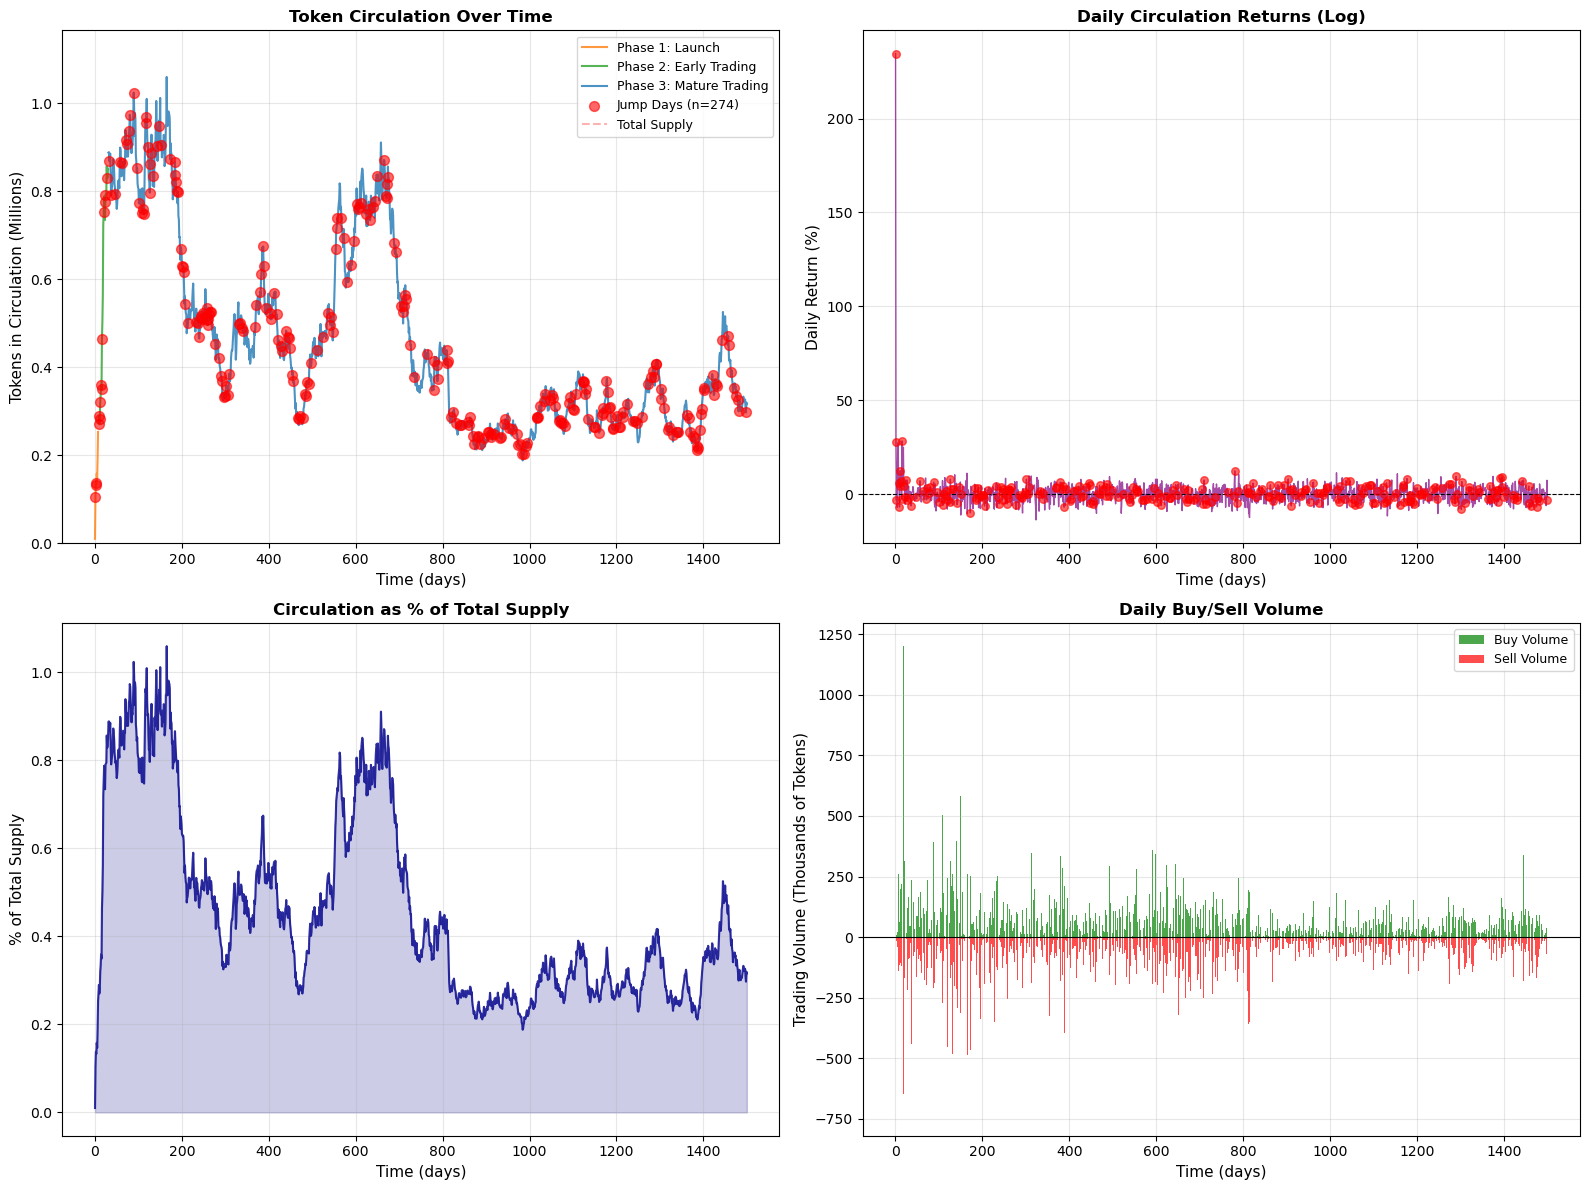


SIMPLIFIED VERSION - TRACKING ONLY:
✓ Token circulation (using jump diffusion model)
✓ Daily buy/sell volumes
✓ Jump events
✓ Phase transitions


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import requests
import time
from datetime import datetime, timedelta

class TokenCirculationSimulator:
    """
    Simulates token circulation dynamics using Jump Diffusion Model.
    
    One calculation per day, tracks only:
    - Tokens in circulation
    - Daily buy/sell volume
    - Jump events
    """
    
    def __init__(self, 
                 total_supply=100_000_000,
                 initial_circulation=10_000,
                 mature_volatility=0.04,
                 mature_jump_intensity=0.2,
                 mature_jump_mean=-0.02,
                 mature_jump_std=0.08,
                 btc_correlation=0.6,
                 state_file='token_state.json'):
        """Initialize the token circulation simulator."""
        self.total_supply = total_supply
        self.mature_sigma = mature_volatility
        self.mature_lambda = mature_jump_intensity
        self.mature_jump_mu = mature_jump_mean
        self.mature_jump_sigma = mature_jump_std
        self.btc_correlation = btc_correlation
        self.state_file = state_file
        
        if os.path.exists(state_file):
            self.load_state()
        else:
            self.initialize_new_token(initial_circulation)
    
    def initialize_new_token(self, initial_circulation):
        """Initialize a new token launch simulation."""
        self.state = {
            'current_circulation': initial_circulation,
            'current_day': 0,
            'launch_date': datetime.now().isoformat(),
            'circulation_history': [initial_circulation],
            'time_history': [0],
            'jump_history': [False],
            'phase_history': [1],
            'buy_volume_history': [0],
            'sell_volume_history': [0],
            
            # Bitcoin data cache
            'btc_cache': None,
            'btc_cache_timestamp': 0
        }
        self.save_state()
        print(f"New token initialized: {initial_circulation:,} / {self.total_supply:,} tokens in circulation")
    
    def save_state(self):
        """Save current state to JSON file."""
        with open(self.state_file, 'w') as f:
            json.dump(self.state, f, indent=2)
    
    def load_state(self):
        """Load state from JSON file."""
        with open(self.state_file, 'r') as f:
            self.state = json.load(f)
        print(f"Loaded token state: Day {self.state['current_day']}, "
              f"{self.state['current_circulation']:,.0f} tokens circulating")
    
    def reset(self, initial_circulation=10_000):
        """Reset simulation to start a new token."""
        if os.path.exists(self.state_file):
            os.remove(self.state_file)
        self.initialize_new_token(initial_circulation)
    
    def get_phase_parameters(self, current_day):
        """
        Get simulation parameters based on current phase.
        
        Returns:
            tuple: (phase, drift, sigma, lambda, jump_mu, jump_sigma, btc_corr)
        """
        phase1_days = 7
        phase2_days = 23
        
        if current_day < phase1_days:
            # PHASE 1: Launch - Explosive growth
            return (1, 0.08, 0.12, 1.2, 0.20, 0.15, 0.0)
        
        elif current_day < phase1_days + phase2_days:
            # PHASE 2: Early trading - Transition
            progress = (current_day - phase1_days) / phase2_days
            return (
                2,
                0.08 * (1 - progress) + 0.002 * progress,
                0.12 * (1 - progress) + self.mature_sigma * progress,
                1.2 * (1 - progress) + self.mature_lambda * progress,
                0.20 * (1 - progress) + self.mature_jump_mu * progress,
                0.15 * (1 - progress) + self.mature_jump_sigma * progress,
                0.3 * progress
            )
        
        else:
            # PHASE 3: Mature trading - NO DRIFT (random walk)
            return (3, 0.0, self.mature_sigma, self.mature_lambda,
                   self.mature_jump_mu, self.mature_jump_sigma, self.btc_correlation)
    
    def get_bitcoin_daily_return(self):
        """Fetch actual Bitcoin daily return from CoinGecko API with caching."""
        cache_duration = 43200  # 12 hours
        current_time = time.time()
        
        if self.state.get('btc_cache') is not None:
            cache_age = current_time - self.state.get('btc_cache_timestamp', 0)
            if cache_age < cache_duration:
                return self.state['btc_cache']
        
        try:
            time.sleep(1.5)
            
            url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
            params = {'vs_currency': 'usd', 'days': '2', 'interval': 'daily'}
            
            response = requests.get(url, params=params, timeout=10)
            response.raise_for_status()
            data = response.json()
            
            prices = [p[1] for p in data['prices']]
            
            if len(prices) >= 2:
                btc_return = (prices[-1] / prices[-2]) - 1
                self.state['btc_cache'] = btc_return
                self.state['btc_cache_timestamp'] = current_time
                print(f"✓ Fetched Bitcoin data: {btc_return*100:+.2f}% daily return")
                return btc_return
            else:
                return 0.0
                
        except Exception as e:
            print(f"Warning: Could not fetch Bitcoin data, using 0")
            return self.state.get('btc_cache', 0.0)
    
    def simulate_one_day(self, btc_daily_return=None):
        """
        Simulate ONE day using 24 hourly steps internally for realistic volatility.
        Only saves the final daily closing value (one datapoint per day).
        
        Args:
            btc_daily_return: Bitcoin's actual daily return (fetched automatically if None)
        
        Returns:
            dict: Summary of the day's activity
        """
        current_day = self.state['current_day']
        opening_circulation = self.state['current_circulation']
        current_circulation = opening_circulation
        
        # Get parameters for current phase
        phase, mu, sigma, lambda_jump, jump_mu, jump_sigma, btc_corr = \
            self.get_phase_parameters(current_day)
        
        # Fetch Bitcoin return if in Phase 3
        btc_correlation_fetched = False
        if phase == 3 and btc_daily_return is None:
            btc_daily_return = self.get_bitcoin_daily_return()
            btc_correlation_fetched = True
        
        # Simulate 24 hourly steps for realistic volatility
        steps_per_day = 24
        dt = 1.0 / steps_per_day
        
        day_had_jumps = False
        
        # Bitcoin correlation component (distributed across steps)
        btc_correlation_applied = False
        btc_component_per_step = 0
        if phase == 3 and btc_daily_return is not None:
            btc_component_per_step = btc_corr * btc_daily_return / steps_per_day
            btc_correlation_applied = True
        
        # Simulate each hourly step
        for step in range(steps_per_day):
            # Calculate current proportion of supply in circulation
            proportion = current_circulation / self.total_supply
            
            # Apply dampening ONLY near boundaries (not in the middle!)
            boundary_factor = 1.0
            if proportion > 0.90:  # Near maximum
                boundary_factor = (1.0 - proportion) * 10  # Dampen as we approach 100%
            elif proportion < 0.001:  # Near minimum (0.1%)
                boundary_factor = proportion * 1000  # Dampen as we approach 0%
            
            # Continuous component (Geometric Brownian Motion)
            dW = np.random.normal(0, np.sqrt(dt))
            continuous_return = (mu - 0.5 * sigma**2) * dt + sigma * dW * boundary_factor
            
            # Add Bitcoin-correlated component
            if btc_correlation_applied:
                continuous_return += btc_component_per_step
            
            # Jump component (Poisson process)
            jump_occurred = np.random.poisson(lambda_jump * dt) > 0
            jump_return = 0
            if jump_occurred:
                day_had_jumps = True
                num_jumps = np.random.poisson(lambda_jump * dt)
                jump_return = np.sum(np.random.normal(jump_mu, jump_sigma, num_jumps))
                jump_return *= boundary_factor
            
            # Total return and new circulation
            total_return = continuous_return + jump_return
            new_circulation = current_circulation * np.exp(total_return)
            
            # Hard bounds enforcement
            new_circulation = max(
                self.total_supply * 0.001,  # Min 0.1% circulation
                min(new_circulation, self.total_supply * 0.95)  # Max 95% circulation
            )
            
            current_circulation = new_circulation
        
        # Now current_circulation has the closing value after 24 steps
        closing_circulation = current_circulation
        circulation_change = closing_circulation - opening_circulation
        circulation_change_pct = (circulation_change / opening_circulation) * 100
        
        # Calculate buy/sell volumes
        # If net positive: more buying than selling
        # If net negative: more selling than buying
        total_daily_volume = abs(circulation_change) * np.random.uniform(5, 15)  # Volume is multiple of net change
        
        if circulation_change > 0:
            # Net buying day
            buy_volume = total_daily_volume * 0.65
            sell_volume = total_daily_volume * 0.35
        else:
            # Net selling day
            buy_volume = total_daily_volume * 0.35
            sell_volume = total_daily_volume * 0.65
        
        # Update state - ONLY SAVE THE DAILY CLOSING VALUE
        self.state['current_circulation'] = closing_circulation
        self.state['current_day'] += 1
        self.state['circulation_history'].append(closing_circulation)
        self.state['time_history'].append(self.state['current_day'])
        self.state['jump_history'].append(day_had_jumps)
        self.state['phase_history'].append(phase)
        self.state['buy_volume_history'].append(buy_volume)
        self.state['sell_volume_history'].append(sell_volume)
        
        self.save_state()
        
        # Prepare summary
        summary = {
            'day': self.state['current_day'],
            'phase': phase,
            'opening_circulation': opening_circulation,
            'closing_circulation': closing_circulation,
            'circulation_change': circulation_change,
            'circulation_change_pct': circulation_change_pct,
            'percent_of_supply': (closing_circulation / self.total_supply) * 100,
            'buy_volume': buy_volume,
            'sell_volume': sell_volume,
            'net_volume': buy_volume - sell_volume,
            'jumps': day_had_jumps,  # True if ANY jump occurred during the day
            'btc_correlation_applied': btc_correlation_applied,
            'btc_correlation_fetched': btc_correlation_fetched,
            'btc_daily_return': btc_daily_return if btc_daily_return else 0,
        }
        
        return summary
    
    def get_history(self):
        """Get complete history arrays."""
        return {
            'times': np.array(self.state['time_history']),
            'circulation': np.array(self.state['circulation_history']),
            'jumps': np.array(self.state['jump_history']),
            'phases': np.array(self.state['phase_history']),
            'buy_volume': np.array(self.state['buy_volume_history']),
            'sell_volume': np.array(self.state['sell_volume_history'])
        }
    
    def get_current_status(self):
        """Get current status summary."""
        phase_names = {1: "Launch/Price Discovery", 
                      2: "Early Trading", 
                      3: "Mature Trading"}
        current_phase = self.state['phase_history'][-1]
        
        return {
            'day': self.state['current_day'],
            'circulation': self.state['current_circulation'],
            'percent_of_supply': (self.state['current_circulation'] / self.total_supply) * 100,
            'phase': current_phase,
            'phase_name': phase_names[current_phase],
            'total_supply': self.total_supply
        }


def plot_history(model, title="Token Circulation History"):
    """Visualize token circulation and trading volumes."""
    history = model.get_history()
    times = history['times']
    circulation = history['circulation']
    jumps = history['jumps']
    phases = history['phases']
    
    if len(times) < 2:
        print("Not enough data to plot yet.")
        return None
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Token Circulation
    for phase_num, color, label in [(1, '#ff7f0e', 'Phase 1: Launch'),
                                     (2, '#2ca02c', 'Phase 2: Early Trading'),
                                     (3, '#1f77b4', 'Phase 3: Mature Trading')]:
        mask = phases == phase_num
        if np.any(mask):
            ax1.plot(times[mask], circulation[mask] / 1e6, linewidth=1.5,
                    color=color, alpha=0.8, label=label)
    
    jump_times = times[jumps]
    jump_circulation = circulation[jumps]
    if len(jump_times) > 0:
        ax1.scatter(jump_times, jump_circulation / 1e6, color='red', s=50,
                   alpha=0.6, zorder=5, label=f'Jump Days (n={np.sum(jumps)})')
    
    ax1.axhline(y=model.total_supply / 1e6, color='red', linestyle='--',
               alpha=0.3, label='Total Supply')
    ax1.set_xlabel('Time (days)', fontsize=11)
    ax1.set_ylabel('Tokens in Circulation (Millions)', fontsize=11)
    ax1.set_title('Token Circulation Over Time', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Dynamic y-axis: set upper limit to 110% of max circulation
    max_circulation = np.max(circulation) / 1e6
    ax1.set_ylim(0, max_circulation * 1.10)
    
    ax1.legend(fontsize=9)
    
    # Plot 2: Daily Returns
    returns = np.diff(np.log(circulation)) * 100  # Log returns in percentage
    ax2.plot(times[1:], returns, linewidth=1.0, color='purple', alpha=0.7)
    ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    
    # Highlight jump days on returns plot
    jump_returns_mask = jumps[1:]  # Align with returns array (which is 1 shorter)
    if np.any(jump_returns_mask):
        ax2.scatter(times[1:][jump_returns_mask], returns[jump_returns_mask], 
                   color='red', s=30, alpha=0.6, zorder=5)
    
    ax2.set_xlabel('Time (days)', fontsize=11)
    ax2.set_ylabel('Daily Return (%)', fontsize=11)
    ax2.set_title('Daily Circulation Returns (Log)', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Percent of Supply
    percent_supply = (circulation / model.total_supply) * 100
    ax3.plot(times, percent_supply, linewidth=1.5, color='darkblue', alpha=0.8)
    ax3.fill_between(times, 0, percent_supply, alpha=0.2, color='darkblue')
    ax3.set_xlabel('Time (days)', fontsize=11)
    ax3.set_ylabel('% of Total Supply', fontsize=11)
    ax3.set_title('Circulation as % of Total Supply', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Buy/Sell Volume
    if len(times) > 1:
        ax4.bar(times[1:], history['buy_volume'][1:] / 1e3, 
               label='Buy Volume', alpha=0.7, color='green', width=0.8)
        ax4.bar(times[1:], -history['sell_volume'][1:] / 1e3, 
               label='Sell Volume', alpha=0.7, color='red', width=0.8)
        ax4.axhline(y=0, color='black', linewidth=0.8)
        ax4.set_xlabel('Time (days)', fontsize=11)
        ax4.set_ylabel('Trading Volume (Thousands of Tokens)', fontsize=11)
        ax4.set_title('Daily Buy/Sell Volume', fontsize=12, fontweight='bold')
        ax4.grid(True, alpha=0.3)
        ax4.legend(fontsize=9)
    
    plt.tight_layout()
    return fig


# ============================================================================
# EXAMPLE USAGE
# ============================================================================
if __name__ == "__main__":
    print("="*70)
    print("TOKEN CIRCULATION SIMULATOR - SIMPLE VERSION")
    print("="*70)
    print()
    
    # Initialize model
    model = TokenCirculationSimulator(
        total_supply=100_000_000,
        initial_circulation=10_000,
        mature_volatility=0.04,
        mature_jump_intensity=0.2,
        mature_jump_mean=-0.02,
        mature_jump_std=0.08,
        btc_correlation=0.6,
        state_file='token_state_simple.json'
    )
    
    # Reset to start fresh
    model.reset(initial_circulation=10_000)
    
    # Show current status
    status = model.get_current_status()
    print(f"Current Status:")
    print(f"  Day: {status['day']}")
    print(f"  Circulation: {status['circulation']:,.0f} tokens ({status['percent_of_supply']:.2f}%)")
    print(f"  Phase: {status['phase_name']}")
    print()
    
    print("="*70)
    print("SIMULATING 180 DAYS")
    print("="*70)
    print()
    
    for day in range(1500):
        summary = model.simulate_one_day()
        
        # Print milestones
        if day in [0, 6, 19, 39, 59, 120, 179]:
            print(f"Day {summary['day']:3d} | Phase {summary['phase']} | "
                  f"Circ: {summary['closing_circulation']:>10,.0f} ({summary['percent_of_supply']:5.2f}%) | "
                  f"Change: {summary['circulation_change_pct']:+6.2f}% | "
                  f"Buy Vol: {summary['buy_volume']:>8,.0f} | "
                  f"Sell Vol: {summary['sell_volume']:>8,.0f} | "
                  f"Jump: {'YES' if summary['jumps'] else 'NO'}")
    
    print()
    
    # Final status
    final_status = model.get_current_status()
    print("="*70)
    print("FINAL STATUS")
    print("="*70)
    print(f"Day: {final_status['day']}")
    print(f"Circulation: {final_status['circulation']:,.0f} ({final_status['percent_of_supply']:.2f}%)")
    print(f"Phase: {final_status['phase_name']}")
    print("="*70)
    
    # Visualization
    print("\nGenerating visualization...")
    fig = plot_history(model, title=f"Token Circulation – Day {final_status['day']}")
    if fig:
        plt.show()
    
    print("\n" + "="*70)
    print("SIMPLIFIED VERSION - TRACKING ONLY:")
    print("="*70)
    print("✓ Token circulation (using jump diffusion model)")
    print("✓ Daily buy/sell volumes")
    print("✓ Jump events")
    print("✓ Phase transitions")
    print("="*70)